In [1]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import (
    ChatPromptTemplate,
)
from langchain_experimental.utilities import PythonREPL
from langchain_openai import ChatOpenAI
import pandas as pd 
import json



First we deal with the data

In [25]:

df = pd.read_html('./players_Big 5 European Leagues Combined_2324_standard.html')
df = df[0]
df.head()
df.reset_index(inplace=True)
df.columns = df.columns.droplevel(0)
new_columns = ['', 'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
    'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
    'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
    'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90', 'xG/90', 'xAG/90',
    'xG+xAG/90', 'npxG/90', 'npxG+xAG/90', 'Matches']

df.columns = new_columns



In [34]:
df

,,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,...,Ast/90,G+A/90,G-PK/90,G+A-PK/90,xG/90,xAG/90,xG+xAG/90,npxG/90,npxG+xAG/90,Matches
0,0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24-005,2000,13,...,0.09,0.09,0.00,0.09,0.00,0.07,0.07,0.00,0.07,Matches
1,1,2,Brenden Aaronson,us USA,MF,Union Berlin,de Bundesliga,23-079,2000,11,...,0.00,0.00,0.00,0.00,0.04,0.07,0.11,0.04,0.11,Matches
2,2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,20-136,2003,7,...,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19,Matches
3,3,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,36-103,1987,16,...,0.00,0.19,0.19,0.19,0.14,0.01,0.15,0.14,0.15,Matches
4,4,5,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,23-289,2000,17,...,0.00,0.00,0.00,0.00,0.06,0.04,0.10,0.06,0.10,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,2523,2427,Igor Zubeldia,es ESP,DF,Real Sociedad,es La Liga,26-285,1997,18,...,0.06,0.06,0.00,0.06,0.02,0.04,0.06,0.02,0.06,Matches
2524,2524,2428,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,24-341,1999,19,...,0.06,0.28,0.22,0.28,0.11,0.06,0.17,0.11,0.17,Matches
2525,2525,2429,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,25-023,1998,17,...,0.18,0.42,0.12,0.30,0.24,0.21,0.45,0.14,0.35,Matches
2526,2526,2430,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33-232,1990,18,...,0.09,0.43,0.26,0.34,0.29,0.10,0.39,0.15,0.25,Matches


In [26]:
df.to_csv('players_Big 5 European Leagues Combined_2324_standard.csv', index=False)

convert values to numeric for easy computation and comparisons 

In [27]:
df['Age'] = df['Age'].str[:2]
df['Age'] =pd.to_numeric(df['Age'], errors='coerce')
df['90s'] =pd.to_numeric(df['90s'], errors='coerce')
columns_to_convert = ['MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
                      'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
                      'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90',
                      'xG/90', 'xAG/90', 'xG+xAG/90', 'npxG/90', 'npxG+xAG/90','Matches']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df.MP = pd.to_numeric(df.MP, errors='coerce')   

In [28]:
df

,,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,...,Ast/90,G+A/90,G-PK/90,G+A-PK/90,xG/90,xAG/90,xG+xAG/90,npxG/90,npxG+xAG/90,Matches
0,0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000,13.0,...,0.09,0.09,0.00,0.09,0.00,0.07,0.07,0.00,0.07,NaN
1,1,2,Brenden Aaronson,us USA,MF,Union Berlin,de Bundesliga,23.0,2000,11.0,...,0.00,0.00,0.00,0.00,0.04,0.07,0.11,0.04,0.11,NaN
2,2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,20.0,2003,7.0,...,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19,NaN
3,3,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,36.0,1987,16.0,...,0.00,0.19,0.19,0.19,0.14,0.01,0.15,0.14,0.15,NaN
4,4,5,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,23.0,2000,17.0,...,0.00,0.00,0.00,0.00,0.06,0.04,0.10,0.06,0.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,2523,2427,Igor Zubeldia,es ESP,DF,Real Sociedad,es La Liga,26.0,1997,18.0,...,0.06,0.06,0.00,0.06,0.02,0.04,0.06,0.02,0.06,NaN
2524,2524,2428,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,24.0,1999,19.0,...,0.06,0.28,0.22,0.28,0.11,0.06,0.17,0.11,0.17,NaN
2525,2525,2429,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,25.0,1998,17.0,...,0.18,0.42,0.12,0.30,0.24,0.21,0.45,0.14,0.35,NaN
2526,2526,2430,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33.0,1990,18.0,...,0.09,0.43,0.26,0.34,0.29,0.10,0.39,0.15,0.25,NaN


In [23]:
u_prompt = "top ten players with more than 5 goals"
players_with_more_than_5_goals = df[df['Gls'] > 5][['Player','Squad' ,'Comp','Gls', 'MP', 'Nation', 'Age', 'xG']] 
players_with_more_than_5_goals = players_with_more_than_5_goals.sort_values(by='Gls', ascending=False)
players_with_more_than_5_goals.head(10)


KeyError: 'Gls'

In [7]:
players_laliga = df[df['Comp'] == 'es La Liga'][['Player', 'Squad','Comp', 'Gls', 'MP', 'Nation', 'Age']].sort_values(by='Gls', ascending=False).head(1).to_json(orient='records')
players_laliga

'[{"Player":"Jude Bellingham","Squad":"Real Madrid","Comp":"es La Liga","Gls":13.0,"MP":17.0,"Nation":"eng ENG","Age":20.0}]'

In [8]:
u_prompt = "players with most xg in the epl "
players_eng_xg = df[df['Comp'] == 'eng Premier League'][['Player','Squad', 'Comp', 'xG', 'MP', 'Nation', 'Age']]
players_eng_xg = players_eng_xg.sort_values(by='xG', ascending=False)
players_eng_xg.head(10).to_json(orient='records')


'[{"Player":"Erling Haaland","Squad":"Manchester City","Comp":"eng Premier League","xG":14.8,"MP":15.0,"Nation":"no NOR","Age":23.0},{"Player":"Mohamed Salah","Squad":"Liverpool","Comp":"eng Premier League","xG":14.3,"MP":20.0,"Nation":"eg EGY","Age":31.0},{"Player":"Dominic Solanke","Squad":"Bournemouth","Comp":"eng Premier League","xG":11.0,"MP":19.0,"Nation":"eng ENG","Age":26.0},{"Player":"Nicolas Jackson","Squad":"Chelsea","Comp":"eng Premier League","xG":10.6,"MP":19.0,"Nation":"sn SEN","Age":22.0},{"Player":"Alexander Isak","Squad":"Newcastle Utd","Comp":"eng Premier League","xG":9.2,"MP":15.0,"Nation":"se SWE","Age":24.0},{"Player":"Ollie Watkins","Squad":"Aston Villa","Comp":"eng Premier League","xG":9.0,"MP":20.0,"Nation":"eng ENG","Age":28.0},{"Player":"Darwin N\\u00fa\\u00f1ez","Squad":"Liverpool","Comp":"eng Premier League","xG":8.6,"MP":19.0,"Nation":"uy URU","Age":24.0},{"Player":"Bryan Mbeumo","Squad":"Brentford","Comp":"eng Premier League","xG":8.5,"MP":15.0,"Nation":"

In [21]:
u_prompt = "top goal scorer in la liga"
players_laliga = df[df['Comp'] == 'es La Liga'][['Player', 'Squad','Comp', 'Gls', 'MP', 'Nation', 'Age']]
players_laliga = players_laliga.sort_values(by='Gls', ascending=False)
s = players_laliga.head(1)
s.to_json(orient='records')

KeyError: 'Comp'

In [29]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

# parameter names of the statistics we want to show

URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

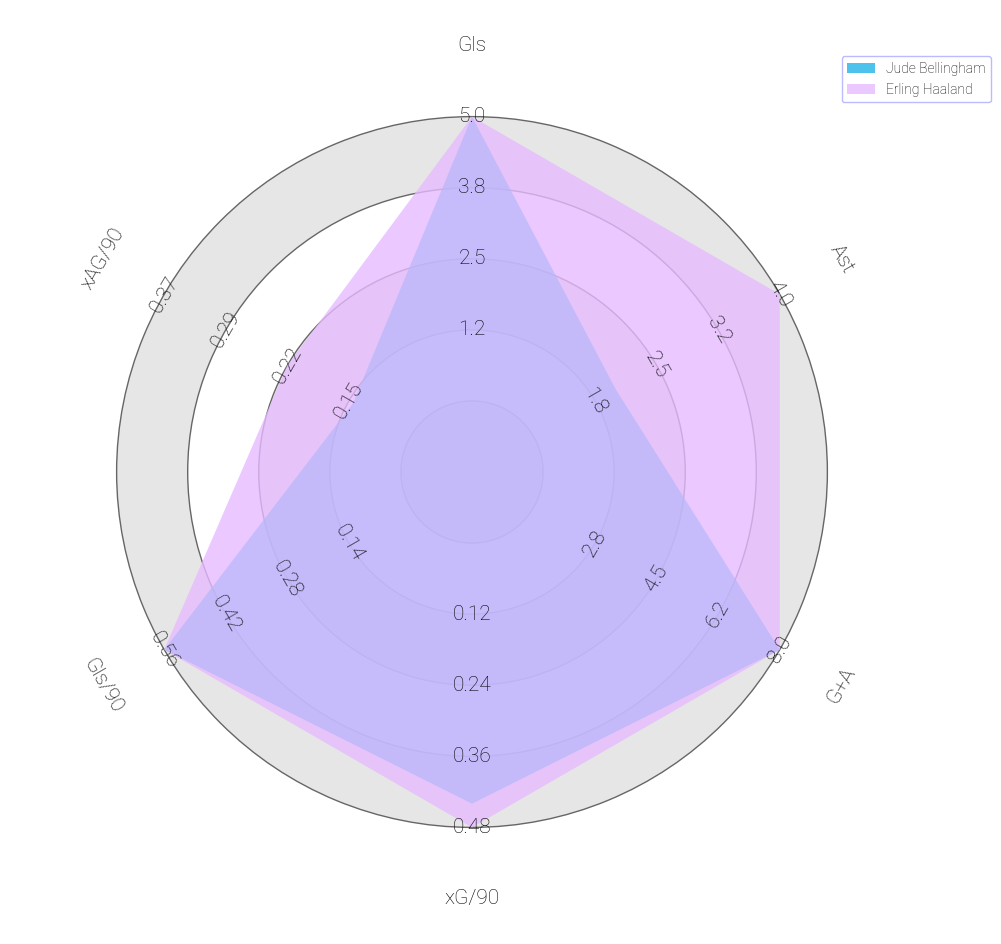

In [30]:

players_laliga = df[df['Comp'] == 'es La Liga'][['Player', 'Squad','Comp', 'Gls', 'Ast','G+A' , 'xG/90', 'Gls/90','xAG/90']]
players_laliga = players_laliga.sort_values(by='Gls', ascending=False)
player1= json.loads(players_laliga.head(1).to_json(orient='records'))
players_epl = df[df['Comp'] == 'eng Premier League'][['Player','Squad', 'Comp', 'Gls', 'Ast','G+A','xG/90', 'Gls/90','xAG/90']]
players_epl = players_epl.sort_values(by='Gls', ascending=False)
player2= json.loads(players_epl.head(1).to_json(orient='records'))
player1= player1[0]
player2= player2[0]
params = list(player1.keys())
params_chosen = params[3:]
player2_values = df[df.Player == player2['Player']][params_chosen].values.tolist()[0]
player1_values = df[df.Player == player1['Player']][params_chosen].values.tolist()[0]
player_values_tuple = (player1, player2)
plot_radar(player_values_tuple)


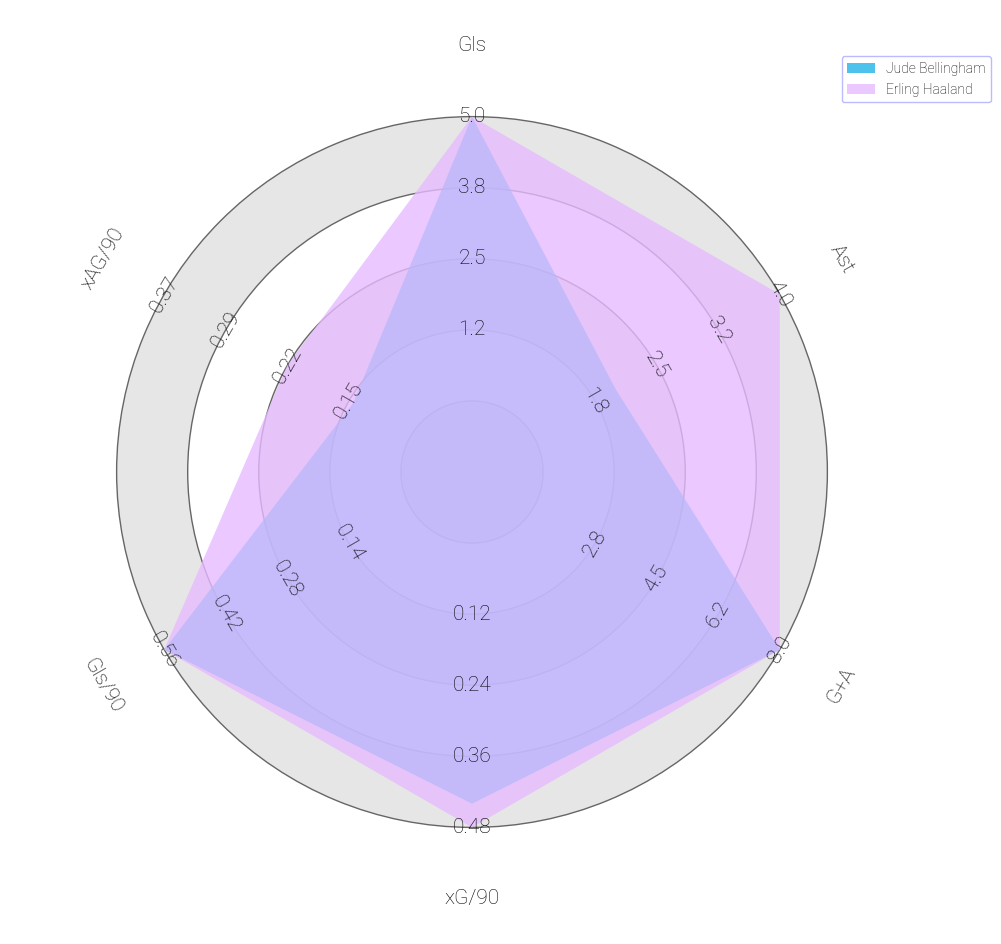

In [31]:

def plot_radar(player_values_tuple):
    player1, player2 = player_values_tuple
   
    # Extract parameters
    params_chosen = list(player1.keys())[3:]
    player2_values = df[df.Player == player2['Player']][params_chosen].values.tolist()[0]
    player1_values = df[df.Player == player1['Player']][params_chosen].values.tolist()[0]
    
    # Calculate low and high values
    #low = [df[i].quantile(0.05) for i in df[params_chosen]]
    #high = [df[i].quantile(1) for i in df[params_chosen]]
    
    low = [df[i].quantile(0.05) + df.loc[df['MP'] > 5, i].values[0] for i in params_chosen]
    high = [df[i].quantile(.95) + df.loc[df['MP'] > 5, i].values[0] for i in params_chosen]
    # Radar setup
    radar = Radar(params_chosen, low, high,
                  round_int=[False]*len(params_chosen),
                  num_rings=4, ring_width=1, center_circle_radius=1)
    
    # Plot radar
    fig, ax = radar.setup_axis()

    # Rings
    rings_inner = radar.draw_circles(ax=ax, facecolor='#e6e6e6', edgecolor='#666666')

    # Radar plot
    radar_output = radar.draw_radar_compare(player1_values, player2_values, ax=ax,
                                            kwargs_radar={'facecolor': '#00a8e6', 'alpha': 0.7},
                                            kwargs_compare={'facecolor': '#e6bbff', 'alpha': 0.8})
    radar_poly, radar_poly2, vertices1, vertices2 = radar_output

    # Labels
    range_labels = radar.draw_range_labels(ax=ax, fontsize=15, fontproperties=robotto_thin.prop)
    param_labels = radar.draw_param_labels(ax=ax, fontsize=15, fontproperties=robotto_thin.prop)

    # Legend
    legend = ax.legend([radar_poly, radar_poly2], [player1['Player'], player2['Player']],
                       loc=(0.9, .90), fontsize=25, frameon=True, prop=robotto_thin.prop)
    # legend.get_frame().set_facecolor('#e6e6e6')  # Light gray legend background
    legend.get_frame().set_edgecolor('#aaaaff66')  # Gray legend edge color

    plt.show()

# Example usage
player_values_tuple = (player1, player2)
plot_radar(player_values_tuple)



In [12]:
params = list(player1.keys())
params_chosen = params[3:]
player2_values = df[df.Player == player2['Player']][params_chosen].values.tolist()[0]
player1_values = df[df.Player == player1['Player']][params_chosen].values.tolist()[0]
player_values_tuple = (player1, player2)
plot_radar(player_values_tuple)


NameError: name 'plot_radar' is not defined

In [13]:
params = list(df.columns[3:]) 
get_player = lambda player_name: json.loads(df[df['Player'] == player_name][['Player', 'Squad', 'Comp', 'Gls', 'Ast', 'G+A', 'xG/90', 'Gls/90', 'xAG/90']].head(1).to_json(orient='records'))[0]
player1, player2 = map(get_player, ['Bukayo Saka', 'Phil Foden'])
plot_radar((player1, player2))

NameError: name 'plot_radar' is not defined

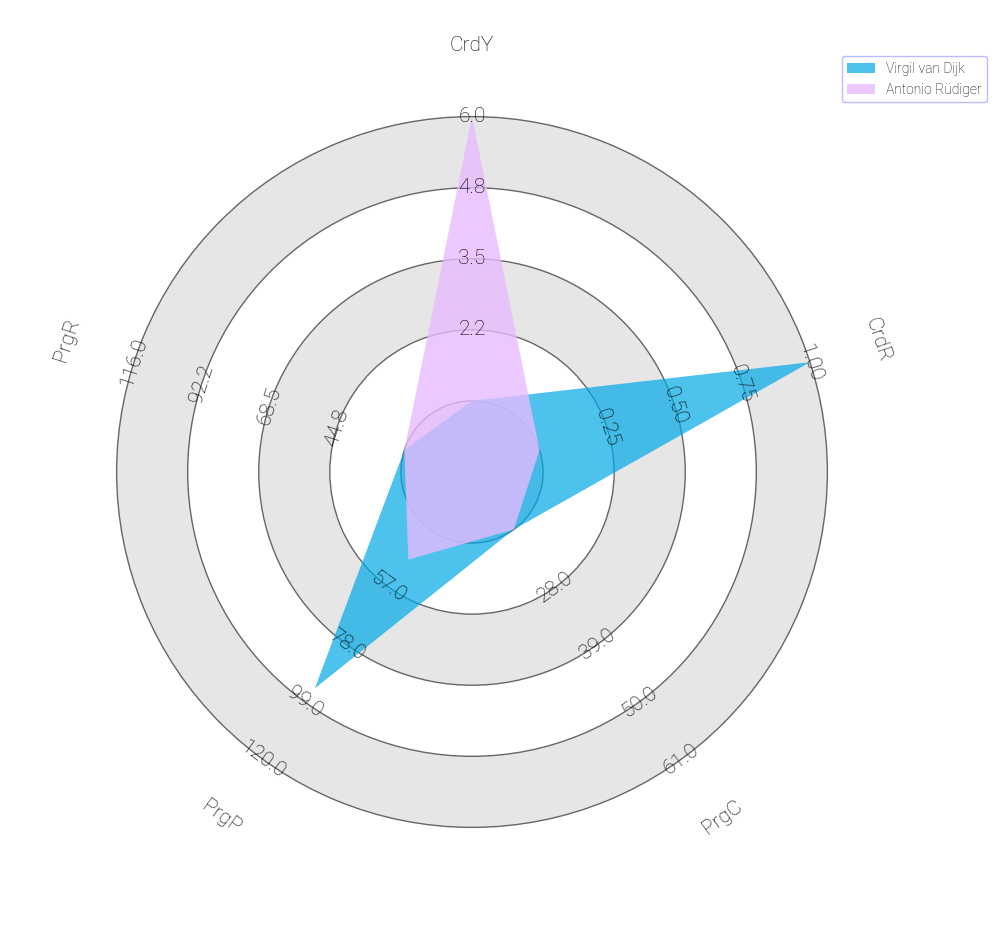

In [35]:
template = """
you help query a database and as such must always return python code!!  that can be executed to get the answer to the question.
a list of column names which correspond to football facts are listed ['MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90', 'xG/90', 'xAG/90',
       'xG+xAG/90', 'npxG/90', 'npxG+xAG/90' ]  


       
       example
        questions: "top goal scorer in la liga"
        you :df[df['Comp'] == 'es La Liga'][['Player', 'Squad','Comp', 'Gls', 'MP', 'Nation', 'Age']].sort_values(by='Gls', ascending=False).head(1).to_json(orient='records')

        questions = "players with most xg in the epl "
        you:df[df['Comp'] == 'eng Premier League'][['Player','Squad', 'Comp', 'xG', 'MP', 'Nation', 'Age']].sort_values(by='xG', ascending=False).head(10).to_json(orient='records')

        questions = "compare the best player in la liga with the best player in the epl"
        you: params = list(df.columns[3:]) 
get_player = lambda player_name: json.loads(df[df['Player'] == player_name][['Player', 'Squad', 'Comp', 'Gls', 'Ast', 'G+A', 'xG/90', 'Gls/90', 'xAG/90']].head(1).to_json(orient='records'))[0]
player1, player2 = map(get_player, ['Bukayo Saka', 'Phil Foden'])
plot_radar((player1, player2))

         """
human_input = "{question}" 
chat_model = ChatOpenAI(temperature=0.2)
chat_prompt = ChatPromptTemplate.from_messages([("system", template), ("human", human_input)])
messages = chat_prompt.format_messages(question = "compare Van dijk and  Rudiger,  on the basis of defensive stats ")
result = chat_model.predict_messages(messages)
insider = result.content
exec(insider,globals(), locals())




In [21]:
players_saka = df[df['Player'].str.contains('Saka', case=False)]
players_saka


,,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,...,Ast/90,G+A/90,G-PK/90,G+A-PK/90,xG/90,xAG/90,xG+xAG/90,npxG/90,npxG+xAG/90,Matches
2034,2034,1957,Bukayo Saka,eng ENG,FW,Arsenal,eng Premier League,22.0,2001,19.0,...,0.33,0.65,0.22,0.54,0.37,0.29,0.67,0.29,0.58,NaN
2428,2428,2336,Aaron Wan-Bissaka,eng ENG,DF,Manchester Utd,eng Premier League,26.0,1997,11.0,...,0.11,0.11,0.00,0.11,0.01,0.14,0.14,0.01,0.14,NaN


In [ ]:
params = ['Player', 'Squad' , 'Gls', 'Ast', 'G+A', 'xG/90', 'Gls/90', 'xAG/90']
player1 = json.loads(df[df['Player'] == 'Saka'][params].to_json(orient='records'))
player2 = json.loads(df[df['Player'] == 'Foden'][params].to_json(orient='records'))
plot_radar((player1, player2))

In [15]:
chat_model = ChatOpenAI()

LangChain. Shall we?   yes we shall.

In [16]:
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen

# get data
parser = Sbopen()
match_files = [19789, 19794, 19805]
# check for which file are available 

df = pd.concat([parser.event(file)[0] for file in match_files])  # 0 index is the event file

# filter chelsea pressure and pass events
mask_chelsea_pressure = (df.team_name == 'Chelsea FCW') & (df.type_name == 'Pressure')
df_pressure = df.loc[mask_chelsea_pressure, ['x', 'y']]
mask_chelsea_pressure = (df.team_name == 'Chelsea FCW') & (df.type_name == 'Pass')
df_pass = df.loc[mask_chelsea_pressure, ['x', 'y', 'end_x', 'end_y']]

In [17]:
def draw_pitch(df_pressure):
    pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22312b', line_color='#efefef')
    fig, ax = pitch.draw(figsize=(6.6, 4.125))
    fig.set_facecolor('#22312b')
    bin_statistic = pitch.bin_statistic(df_pressure.x, df_pressure.y, statistic='count', bins=(25, 25))
    bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
    pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
    cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
    cbar.outline.set_edgecolor('#efefef')
    cbar.ax.yaxis.set_tick_params(color='#efefef')
    ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')


In [18]:
df = pd.concat([parser.event(file)[0] for file in match_files])
df_pressure = df.loc[(df.team_name == 'Chelsea FCW') & (df.type_name == 'Pressure'), ['x', 'y']]
df_pass = df.loc[(df.team_name == 'Chelsea FCW') & (df.type_name == 'Pass'), ['x', 'y', 'end_x', 'end_y']]


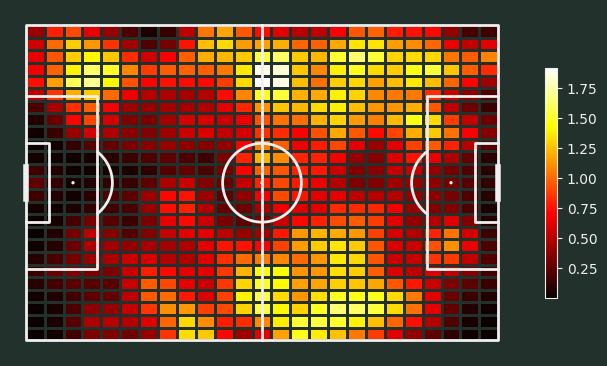

In [19]:
draw_pitch(df_pressure)